<a href="https://colab.research.google.com/github/luisArthurRodriguesDaSilva/estudo-dados-eleicoes/blob/master/progressao_lula_vs_bolsonaro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import requests
import json
import time
import pandas as pd

In [5]:
lula_scores = [43.32, 43.32, 43.49, 43.29, 43.36, 43.59, 44.61, 44.61, 45.06, 45.96, 46.11, 46.43, 46.77, 47.07, 47.29, 47.29, 47.43, 47.61, 47.78, 47.91, 47.95, 47.98, 48.04, 48.04, 48.14, 48.18, 48.23, 48.26, 48.31, 48.32, 48.31, 48.31, 48.36, 48.37, 48.37, 48.43, 48.43, 48.52, 48.57, 48.64]
bolsonaro_scores = [56.68, 56.68, 56.51, 56.71, 56.64, 56.41, 55.39, 55.39, 54.94, 54.04, 53.89, 53.57, 53.23, 52.93, 52.71, 52.71, 52.57, 52.39, 52.22, 52.09, 52.05, 52.02, 51.96, 51.96, 51.86, 51.82, 51.77, 51.74, 51.69, 51.68, 51.69, 51.69, 51.64, 51.63, 51.63, 51.57, 51.57, 51.48, 51.43, 51.36]
apuradas = [1.1650691097812849, 1.1650691097812849, 1.3739342265529841, 1.6433829370333104, 1.8372080707514695, 2.05115712545676, 2.9486840014828153, 2.9486840014828153, 3.4714822856537624, 3.969072710903988, 4.3925223746226765, 4.822326960758354, 5.6173277551236565, 6.264047026425885, 6.906953344277921, 6.906953344277921, 7.532913202351321, 8.060159932214162, 8.714505110416777, 9.441508234920299, 10.095217920881217, 10.724143409415877, 11.382937033310386, 11.382937033310386, 12.029868135359848, 12.64544828681883, 13.255944500344224, 13.942276121379019, 14.608907482921147, 15.345654821797384, 16.22369326907801, 16.22369326907801, 17.0045014033787, 17.729598051157126, 18.537944182598103, 19.232113541280516, 19.985383678440925, 20.77254673515861, 22.30154106868612, 23.050998252396333]
url = 'https://resultados.tse.jus.br/oficial/ele2022/545/dados-simplificados/br/br-c0001-e000545-r.json'
BOLSONARO_TAG = 'JAIR BOLSONARO'
LULA_TAG = 'LULA'

In [ ]:
def getResultsData():
  return requests.get(url).json()
getResultsData()

In [ ]:
def getScore(cand): 
  data = list(filter(lambda x : x['nm'] == cand ,getResultsData()['cand']))[0]
  return float(data['pvap'].replace(',','.'))
getScore(LULA_TAG)

In [8]:
getScore(BOLSONARO_TAG)

51.26

In [9]:
def getpercentualApuradas():
  percentual=int(getResultsData()['st'])/int(getResultsData()['s'])*100
  return float(percentual)
getpercentualApuradas()

25.27882222104538

In [27]:
from matplotlib import pyplot as plt
def showGraph():
  fig, ax = plt.subplots()
  ax.plot(apuradas,lula_scores,color='red',label='LULA')
  ax.plot(apuradas,bolsonaro_scores,color='green',label='BOLSONARO')
  ax.set_ylabel('% votos')
  ax.set_xlabel('% urnas apuradas')
  plt.rcParams.update({'font.size': 15})
  fig.set_size_inches(20,8)
  fig.patch.set_facecolor('xkcd:white')
  #plt.ylim(40,60)
  plt.show()

In [ ]:
while 1 :
  lula_scores.append(getScore(LULA_TAG))
  bolsonaro_scores.append(getScore(BOLSONARO_TAG))
  apuradas.append(getpercentualApuradas())
  print(lula_scores)
  print(bolsonaro_scores)
  print(apuradas)
  time.sleep(60)

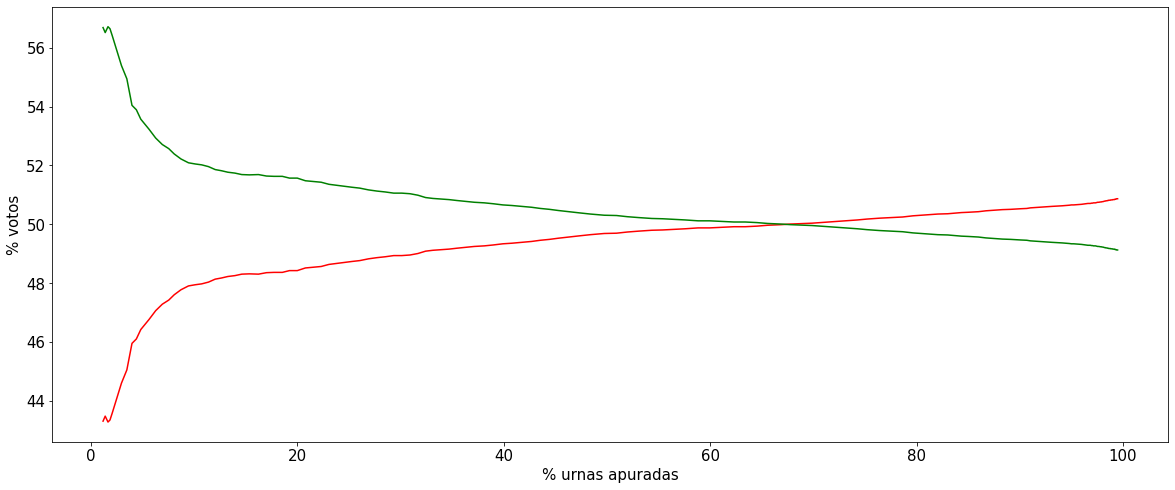

In [30]:
showGraph()

In [ ]:
import pickle as pike

progressao = {
    'lula' :lula_scores,
    'bolsonaro' : bolsonaro_scores,
    'urnas apuradas' : apuradas
}

with open('/content/drive/MyDrive/progressao.pkl','wb') as f:
  pike.dump(progressao,f)

In [ ]:
[43.32, 43.32, 43.49, 43.29, 43.36, 43.59, 44.61, 44.61, 45.06, 45.96, 46.11, 46.43, 46.77, 47.07, 47.29, 47.29, 47.43, 47.61, 47.78, 47.91, 47.95, 47.98, 48.04, 48.04, 48.14, 48.18, 48.23, 48.26, 48.31, 48.32, 48.31, 48.31, 48.36, 48.37, 48.37, 48.43, 48.43, 48.52, 48.57, 48.64, 48.74, 48.77, 48.83, 48.83, 48.87, 48.9, 48.94, 48.94, 48.96, 49.01, 49.09, 49.12, 49.14, 49.16, 49.19, 49.19, 49.22, 49.25, 49.27, 49.3, 49.34, 49.36, 49.39, 49.42, 49.46, 49.49, 49.53, 49.57, 49.61, 49.61, 49.65, 49.69, 49.7, 49.74, 49.77, 49.8, 49.81, 49.81, 49.85, 49.85, 49.88, 49.88, 49.9, 49.92, 49.92, 49.94, 49.97, 49.99, 50.01, 50.01, 50.02, 50.04, 50.1, 50.1, 50.13, 50.15, 50.18, 50.21, 50.23, 50.25, 50.25, 50.29, 50.32, 50.35, 50.36, 50.36, 50.4, 50.41, 50.43, 50.46, 50.48, 50.5, 50.51, 50.52, 50.53, 50.54, 50.56, 50.56, 50.57, 50.58, 50.59, 50.6, 50.61, 50.61, 50.62, 50.62, 50.63, 50.64, 50.65, 50.66, 50.66, 50.68, 50.68, 50.71, 50.71, 50.71, 50.72, 50.72, 50.73, 50.73, 50.73, 50.74, 50.74, 50.75, 50.75, 50.76, 50.76, 50.77, 50.77, 50.78, 50.79, 50.79, 50.8, 50.8, 50.8, 50.8, 50.81, 50.81, 50.82, 50.82, 50.82, 50.82, 50.83, 50.83, 50.83, 50.83, 50.83, 50.84, 50.84, 50.84, 50.84, 50.85, 50.85, 50.85, 50.85, 50.86, 50.86, 50.86, 50.86, 50.86, 50.87, 50.87, 50.87, 50.87]
[56.68, 56.68, 56.51, 56.71, 56.64, 56.41, 55.39, 55.39, 54.94, 54.04, 53.89, 53.57, 53.23, 52.93, 52.71, 52.71, 52.57, 52.39, 52.22, 52.09, 52.05, 52.02, 51.96, 51.96, 51.86, 51.82, 51.77, 51.74, 51.69, 51.68, 51.69, 51.69, 51.64, 51.63, 51.63, 51.57, 51.57, 51.48, 51.43, 51.36, 51.26, 51.23, 51.17, 51.17, 51.13, 51.1, 51.06, 51.06, 51.04, 50.99, 50.91, 50.88, 50.86, 50.84, 50.81, 50.81, 50.78, 50.75, 50.73, 50.7, 50.66, 50.64, 50.61, 50.58, 50.54, 50.51, 50.47, 50.43, 50.39, 50.39, 50.35, 50.31, 50.3, 50.26, 50.23, 50.2, 50.19, 50.19, 50.15, 50.15, 50.12, 50.12, 50.1, 50.08, 50.08, 50.06, 50.03, 50.01, 49.99, 49.99, 49.98, 49.96, 49.9, 49.9, 49.87, 49.85, 49.82, 49.79, 49.77, 49.75, 49.75, 49.71, 49.68, 49.65, 49.64, 49.64, 49.6, 49.59, 49.57, 49.54, 49.52, 49.5, 49.49, 49.48, 49.47, 49.46, 49.44, 49.44, 49.43, 49.42, 49.41, 49.4, 49.39, 49.39, 49.38, 49.38, 49.37, 49.36, 49.35, 49.34, 49.34, 49.32, 49.32, 49.29, 49.29, 49.29, 49.28, 49.28, 49.27, 49.27, 49.27, 49.26, 49.26, 49.25, 49.25, 49.24, 49.24, 49.23, 49.23, 49.22, 49.21, 49.21, 49.2, 49.2, 49.2, 49.2, 49.19, 49.19, 49.18, 49.18, 49.18, 49.18, 49.17, 49.17, 49.17, 49.17, 49.17, 49.16, 49.16, 49.16, 49.16, 49.15, 49.15, 49.15, 49.15, 49.14, 49.14, 49.14, 49.14, 49.14, 49.13, 49.13, 49.13, 49.13]
[1.1650691097812849, 1.1650691097812849, 1.3739342265529841, 1.6433829370333104, 1.8372080707514695, 2.05115712545676, 2.9486840014828153, 2.9486840014828153, 3.4714822856537624, 3.969072710903988, 4.3925223746226765, 4.822326960758354, 5.6173277551236565, 6.264047026425885, 6.906953344277921, 6.906953344277921, 7.532913202351321, 8.060159932214162, 8.714505110416777, 9.441508234920299, 10.095217920881217, 10.724143409415877, 11.382937033310386, 11.382937033310386, 12.029868135359848, 12.64544828681883, 13.255944500344224, 13.942276121379019, 14.608907482921147, 15.345654821797384, 16.22369326907801, 16.22369326907801, 17.0045014033787, 17.729598051157126, 18.537944182598103, 19.232113541280516, 19.985383678440925, 20.77254673515861, 22.30154106868612, 23.050998252396333, 25.27882222104538, 26.041412911084045, 26.88767674627972, 26.88767674627972, 27.70661441508235, 28.504157178414445, 29.33072075411746, 30.10496213525393, 30.906317852036224, 31.670391357305512, 32.41878938727956, 33.123550283323624, 33.95752793517979, 34.696393581528355, 35.445215272996876, 35.445215272996876, 36.30037599957634, 37.13477731292697, 38.11491818037388, 38.96584229200869, 39.905523486734104, 40.78292644177302, 41.75056929513319, 42.6934279510671, 43.54519938569083, 44.417094741301696, 45.28877826616534, 46.28226447068792, 47.321506116612824, 47.321506116612824, 48.386379282952916, 49.72832706667373, 50.921993327331464, 51.966742572684424, 53.068050627548594, 54.335433988243395, 55.3939522321665, 55.3939522321665, 57.57157231372134, 57.57157231372134, 58.82243287613197, 59.94365302123603, 61.06148387438437, 62.289678546841074, 63.39607053963883, 64.5302123603241, 65.57877455912727, 66.87962717788487, 67.76571519356035, 67.76571519356035, 68.53317799078536, 69.86686437536407, 72.28639517025897, 72.28639517025897, 73.45845469469894, 74.27908700947943, 75.1967378064926, 76.41095164963194, 77.50463379759573, 78.64767250966477, 78.64767250966477, 79.6464544828682, 80.89964518349838, 82.05518190965418, 83.01265688714717, 83.01265688714717, 84.33448074988085, 84.97632791399671, 85.98739607053963, 86.71249271831807, 87.55812106127205, 88.30694275274055, 89.115712545676, 89.53005348726367, 90.07763596886087, 90.67732881427739, 91.02346025525605, 91.02346025525605, 91.42975162844887, 91.89768574908648, 92.37557591484405, 92.77932531907005, 93.10575650055605, 93.10575650055605, 93.63088492294656, 93.63088492294656, 94.10136101255098, 94.45702483715512, 94.79425938674999, 95.00354816501616, 95.2166498967325, 95.96631891118996, 95.96631891118996, 96.60223481438331, 96.73060424720649, 96.83080019064766, 96.9479425938675, 97.0373351691998, 97.13922575861886, 97.2320076259069, 97.33241540009533, 97.43536514325054, 97.43536514325054, 97.54572896255893, 97.66498967325107, 97.78869882963512, 97.88253985065933, 97.96748398029975, 98.04459037229253, 98.13779590107504, 98.22549383042949, 98.28120531695176, 98.34200074140762, 98.34200074140762, 98.38563787533761, 98.45215272996876, 98.50235661706297, 98.56865964094689, 98.61907535878834, 98.68347190594716, 98.7268972091299, 98.77095800455436, 98.81501879997882, 98.86458719483133, 98.9177567123868, 98.9177567123868, 98.95864004660277, 99.01053857967484, 99.06031880527458, 99.10247312397395, 99.16220939469363, 99.17936768521952, 99.20457554414023, 99.24524704760897, 99.26092252290421, 99.28295292061642, 99.2975692421755, 99.2975692421755, 99.31599851718477, 99.34501932955568, 99.38103055658529, 99.40454376952815, 99.43229359741566, 99.47381242387333]